# Task 5: Exploratory Data Analysis - Sports

## Step 1: Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the Datasets

In [2]:
deliveries = pd.read_csv('C:\\Users\\ANTRA RAJPUROHIT\\OneDrive\\Documents\\VS Code\\The Grip TSF\\The-Sparks-Foundation-Tasks\\data\\task5_deliveries.csv')
matches = pd.read_csv('C:\\Users\\ANTRA RAJPUROHIT\\OneDrive\\Documents\\VS Code\\The Grip TSF\\The-Sparks-Foundation-Tasks\\data\\task5_matches.csv')

## Step 3: Exploratory Data Analysis

### Overview of the Datasets

In [3]:
print("Deliveries Dataset Overview:")
print(deliveries.head())

Deliveries Dataset Overview:
   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_

In [4]:
print("\nMatches Dataset Overview:")
print(matches.head())


Matches Dataset Overview:
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0       

## Step 4: Merge the Datasets

In [5]:
data = pd.merge(deliveries, matches, left_on='match_id', right_on='id')

The code merges the 'deliveries' and 'matches' datasets based on the 'match_id' columns.

## Step 5: Data Visualization

### Most Successful Teams

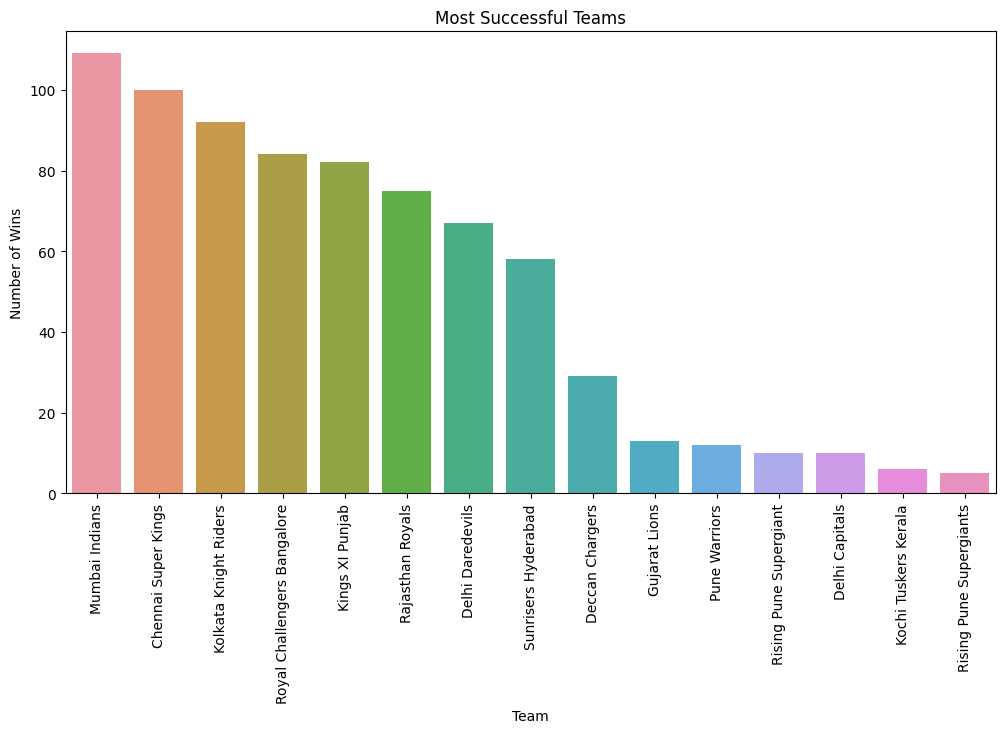

In [6]:
team_wins = matches['winner'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=team_wins.index, y=team_wins.values)
plt.title('Most Successful Teams')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

Calculates the number of wins for each team and creates a bar graph to visualize the most successful teams.

### Most Successful Players

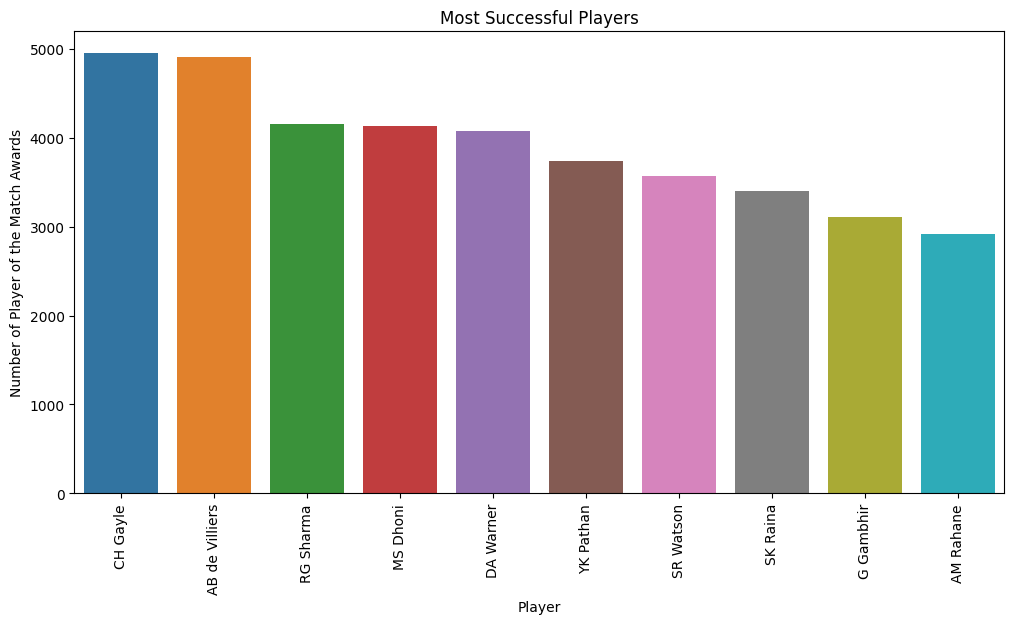

In [7]:
player_wins = data['player_of_match'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=player_wins.index, y=player_wins.values)
plt.title('Most Successful Players')
plt.xlabel('Player')
plt.ylabel('Number of Player of the Match Awards')
plt.xticks(rotation=90)
plt.show()

Determines the players with the highest number of "Players of the Match" awards and creates a bar graph to display the top players.

### Factors Contributing to Win or Loss

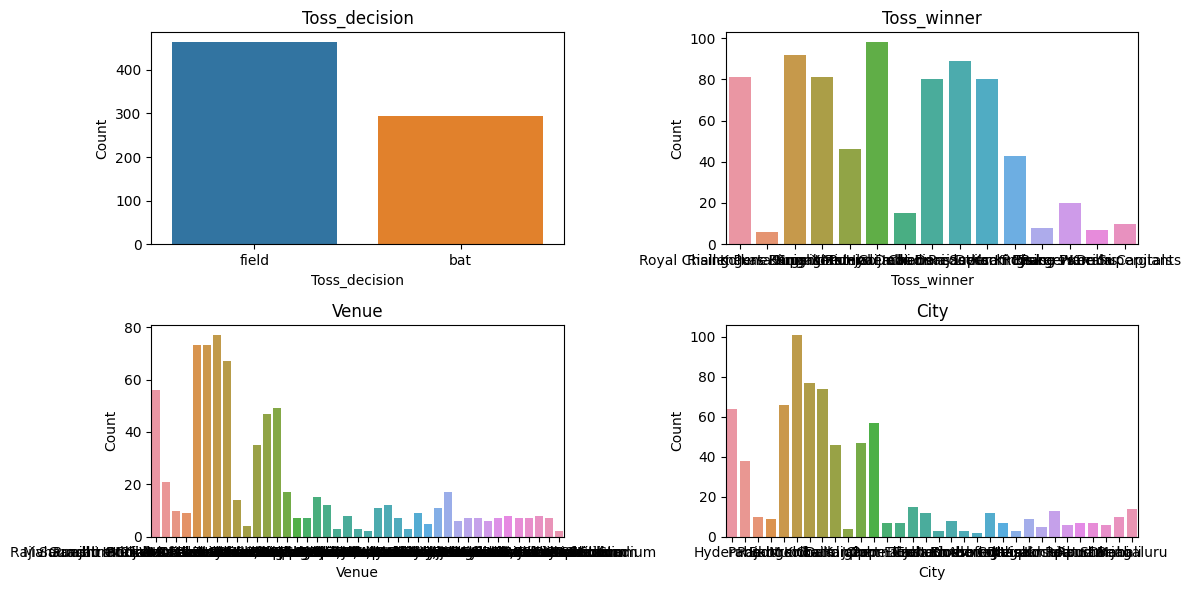

In [8]:
factors = ['toss_decision', 'toss_winner', 'venue', 'city']

plt.figure(figsize=(12, 6))
for i, factor in enumerate(factors, start=1):
    plt.subplot(2, 2, i)
    sns.countplot(x=factor, data=matches)
    plt.title(factor.capitalize())
    plt.xlabel(factor.capitalize())
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

Explores various factors such as toss decision, toss winner, venue, and city that may influence the outcome of matches. It generates count plots for each factor to analyze their impact.

### Teams or Players to Endorse

#### 1. Sugestions based on Number of Wins

In [9]:
top_teams = team_wins[:3].index.tolist()
print("Teams to endorse based on number of wins:")
print(top_teams)

Teams to endorse based on number of wins:
['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders']


#### 2. Suggestions based on Number of Players of the Match Awards

In [10]:
top_players = player_wins.index.tolist()
print("Players to endorse based on number of Player of the Match awards:")
print(top_players)

Players to endorse based on number of Player of the Match awards:
['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner', 'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'AM Rahane']


The code suggests teams to endorse based on the number of wins and players to endorse based on the number of "Players of the Match" awards.

### Relationship between Number of Runs and Wickets

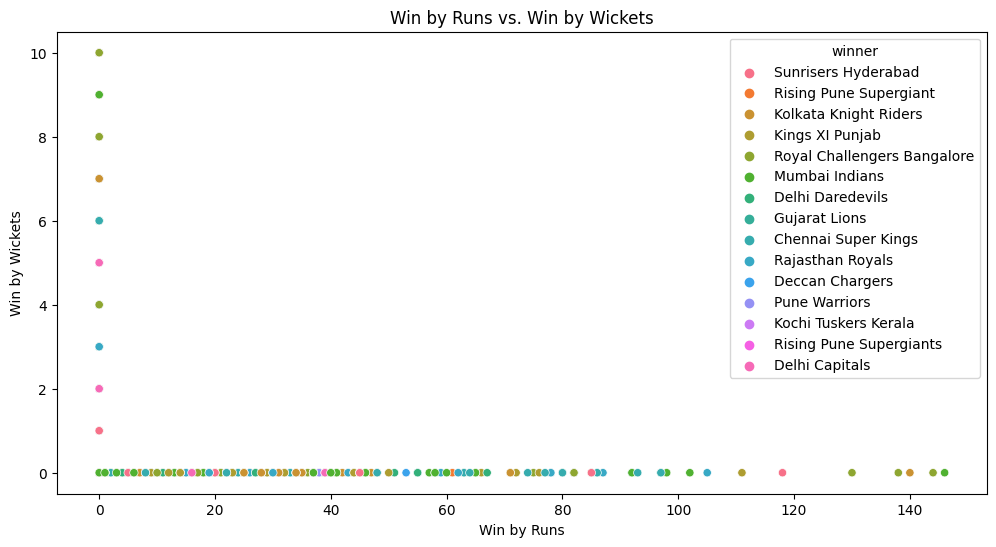

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='win_by_runs', y='win_by_wickets', hue='winner', data=matches)
plt.title('Win by Runs vs. Win by Wickets')
plt.xlabel('Win by Runs')
plt.ylabel('Win by Wickets')
plt.show()

Creates a scatter plot to visualize the relationship between winning by runs and winning by wickets, colored by the winning team.

### Analysis of Dismissals

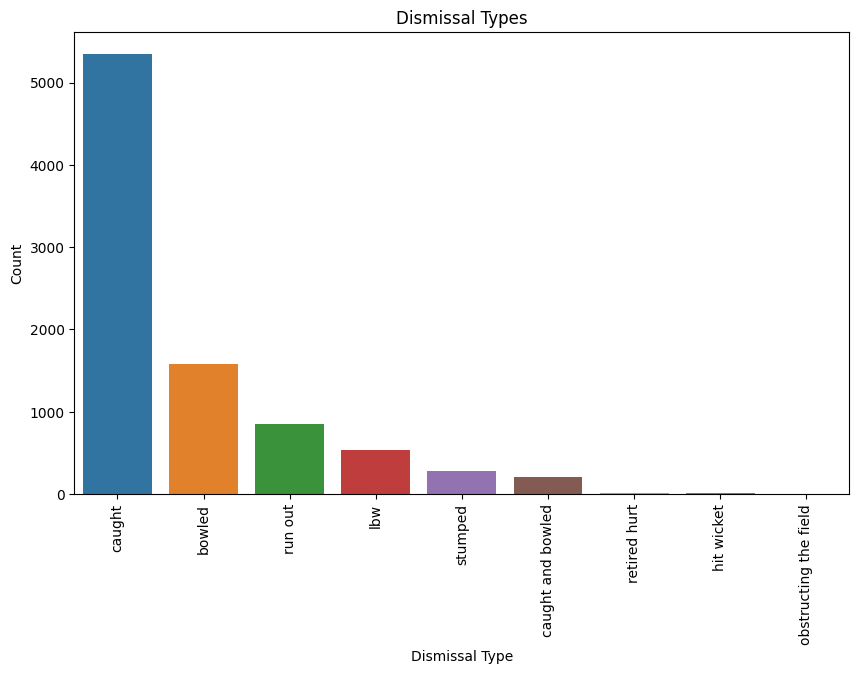

In [12]:
dismissals = data['dismissal_kind'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=dismissals.index, y=dismissals.values)
plt.title('Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Calculates the count of different dismissal types and presents the information in a bar graph.

### Performance by Batting Position

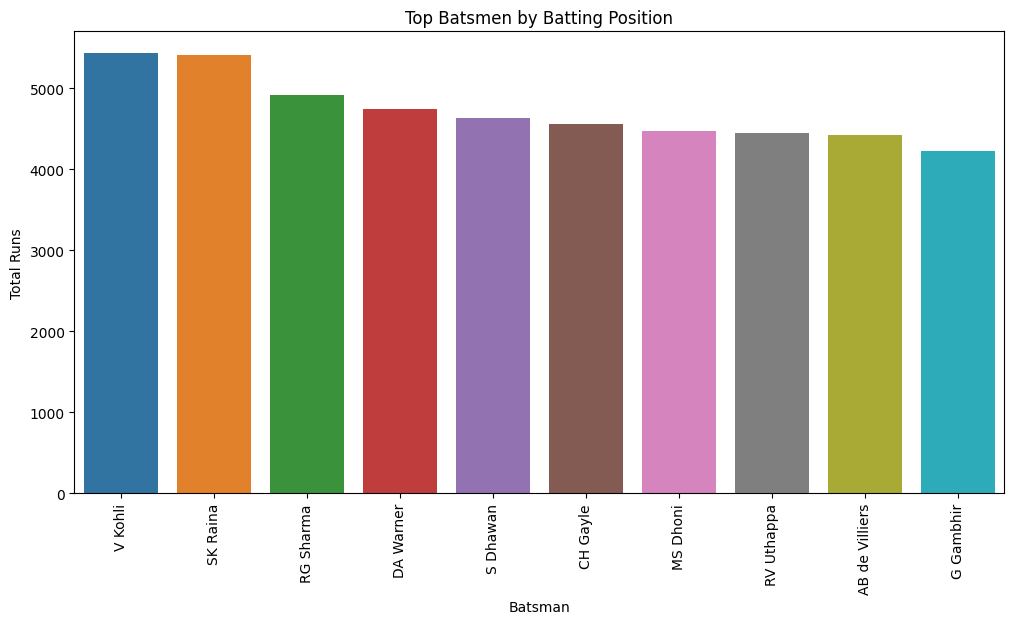

In [13]:
batsmen_position = data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
top_batsmen_position = batsmen_position[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_batsmen_position.index, y=top_batsmen_position.values)
plt.title('Top Batsmen by Batting Position')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

Calculates the total runs scored by batsmen and identifies the top batsmen by batting position. The results are displayed in a bar graph.

### Analysis of Extras

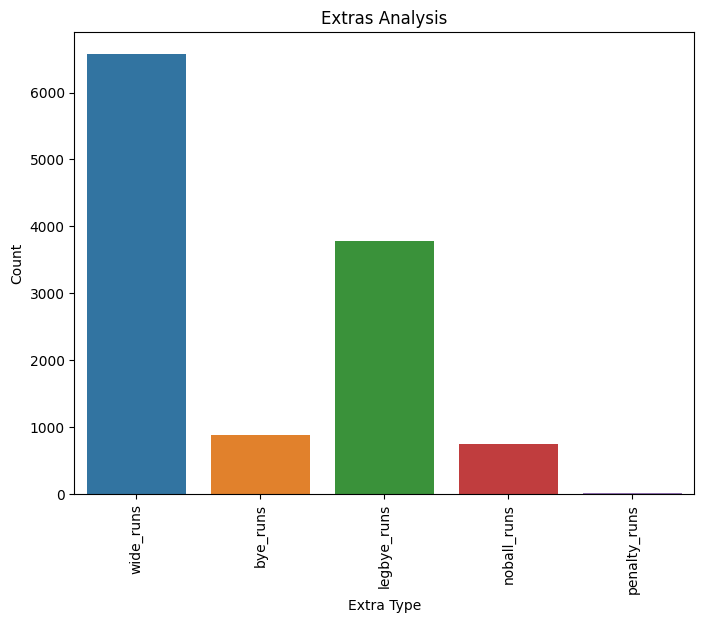

In [14]:
extras = data[['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs']].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=extras.index, y=extras.values)
plt.title('Extras Analysis')
plt.xlabel('Extra Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

It calculates the count of different types of extras (wide, bye, legbye, noball, penalty) and visualizes the information in a bar graph.

## Step 6: Suggest Teams or Players to Endorse

In [15]:
# Suggestions for teams or players to endorse
# Suggestions based on consistent performance
consistent_teams = team_wins[team_wins >= 80].index.tolist()
consistent_players = player_wins[player_wins >= 10].index.tolist()

The code suggests teams and players to endorse based on consistent performance (winning at least 80 matches or receiving at least 10 "Players of the Match" awards).

In [16]:
print("Teams to endorse based on consistent performance (winning at least 80 matches):")
print(consistent_teams)

Teams to endorse based on consistent performance (winning at least 80 matches):
['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Kings XI Punjab']


In [17]:
print("Players to endorse based on consistent performance (winning at least 10 Player of the Match awards):")
print(consistent_players)

Players to endorse based on consistent performance (winning at least 10 Player of the Match awards):
['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner', 'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'AM Rahane']


The outputs include the most successful teams and players, visualizations of various factors and performances, and suggestions for endorsements based on consistent performance.

## Conclusion: the code provides valuable insights into the Indian Premier League, helping sports analysts identify successful teams, players, and factors influencing match outcomes. These insights can guide companies in selecting teams or players for endorsements based on their performance and popularity.